# Project Dự Đoán Giá Nhà

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./data/train.CSV")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data['LotArea'].dtype

dtype('int64')

In [5]:
data.shape

(1460, 81)

In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
data.index

RangeIndex(start=0, stop=1460, step=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
tong_dien_tich = data.groupby('YearBuilt')['LotArea'].sum().sort_values()

# In kết quả tổng hợp
print("\nTổng diện tích theo năm xây dựng:")
print(tong_dien_tich)


Tổng diện tích theo năm xây dựng:
YearBuilt
1913      4280
1872      5250
1875      6342
1898      8100
1911      8525
         ...  
2004    460418
2007    512359
2005    595491
1965    614436
2006    696963
Name: LotArea, Length: 112, dtype: int64


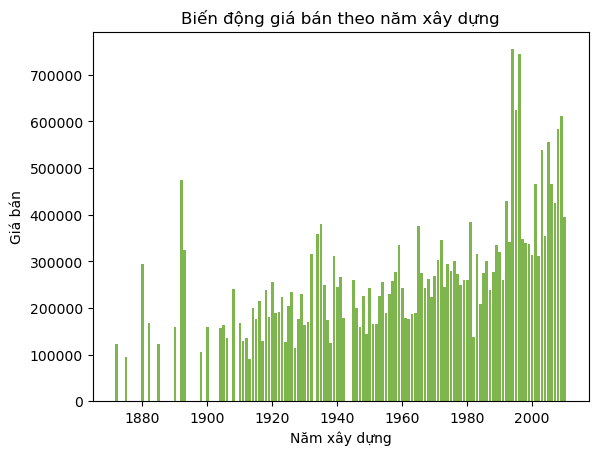

In [10]:
plt.bar(data['YearBuilt'], data['SalePrice'], color='#7eb54e')
plt.xlabel('Năm xây dựng')
plt.ylabel('Giá bán')
plt.title('Biến động giá bán theo năm xây dựng');

In [11]:
correlation = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice']

In [12]:
x = data[correlation]

In [13]:
cereal_corr = x.corr()
cereal_corr

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
LotArea,1.000000,0.014228,0.299475,0.050986,0.126031,0.119690,0.190015,0.263843
YearBuilt,0.014228,1.000000,0.281986,0.010308,0.468271,-0.070651,0.095589,0.522897
1stFlrSF,0.299475,0.281986,1.000000,-0.202646,0.380637,0.127401,0.409516,0.605852
2ndFlrSF,0.050986,0.010308,-0.202646,1.000000,0.421378,0.502901,0.616423,0.319334
FullBath,0.126031,0.468271,0.380637,0.421378,1.000000,0.363252,0.554784,0.560664
BedroomAbvGr,0.119690,-0.070651,0.127401,0.502901,0.363252,1.000000,0.676620,0.168213
TotRmsAbvGrd,0.190015,0.095589,0.409516,0.616423,0.554784,0.676620,1.000000,0.533723
SalePrice,0.263843,0.522897,0.605852,0.319334,0.560664,0.168213,0.533723,1.000000


In [14]:
ones_corr = np.ones_like(cereal_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

In [15]:
ones_corr.shape, cereal_corr.shape 

((8, 8), (8, 8))

In [16]:
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

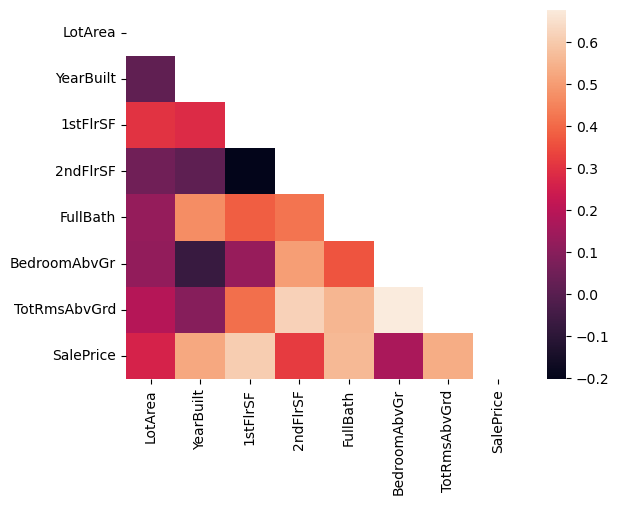

In [17]:
sns.heatmap(data=cereal_corr, mask=mask);

# CHỈNH LẠI MASK

In [18]:
adjusted_mask = mask [1:, :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False]])

In [19]:
adjusted_cereal_corr = cereal_corr.iloc[1:, :-1]

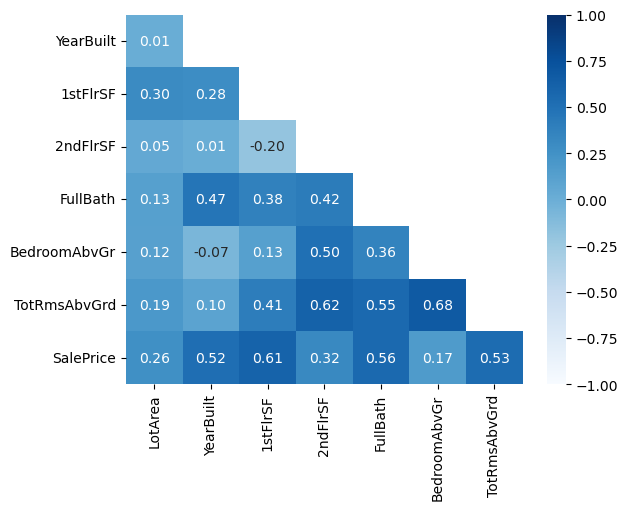

In [20]:
sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
           annot=True, fmt=".2f", cmap="Blues",
           vmin=-1, vmax=1);

## Chọn lọc những Features

In [21]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

# Tách dữ liệu đặc trưng (X) và biến mục tiêu (y)

In [22]:
X = data[features]
y = data["SalePrice"]

In [23]:
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [24]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

# Tách X,y thành X_train, y_train VÀ X_valid, y_valid

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state=0)

In [26]:
X_train.shape

(1168, 7)

In [27]:
X_valid.shape

(292, 7)

# Training ML Model

In [28]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=1)

In [29]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [30]:
y_preds = dt_model.predict(X_valid.head(20))

In [31]:
y_preds

array([335000., 140200., 119000., 207500., 112000.,  58500., 232600.,
       119500., 755000., 156932., 213500., 100000., 244000., 130000.,
       144900., 123000., 236000., 126000., 154500., 128000.])

In [32]:
pd.DataFrame({'y': y_valid.head(20), 'y_preds': y_preds})

,y,y_preds
529,200624,335000.0
491,133000,140200.0
459,110000,119000.0
279,192000,207500.0
655,88000,112000.0
1013,85000,58500.0
1403,282922,232600.0
601,141000,119500.0
1182,745000,755000.0
687,148800,156932.0


# Tiếp tục với RandomForest


In [33]:
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [34]:
rf_val_preds = rf_model.predict(X_valid.head(20))

In [35]:
pd.DataFrame({'y': y_valid.head(20), 'rf_val_preds': rf_val_preds })

,y,rf_val_preds
529,200624,271690.000000
491,133000,155039.000000
459,110000,122024.000000
279,192000,188915.000000
655,88000,91147.000000
1013,85000,88533.200000
1403,282922,240518.240000
601,141000,126286.000000
1182,745000,624269.120000
687,148800,174312.253333


# Đánh giá mô hình dùng  R-squared

In [36]:
#Mô hình DecisionTree
from sklearn.metrics import r2_score
data = pd.DataFrame({'y': y_valid.head(20), 'y_preds': y_preds})    
r2_score(y_valid.head(20) , y_preds)

0.9234464373194715

In [37]:
#Mô hình RandomForest
from sklearn.metrics import r2_score
data = pd.DataFrame({'y': y_valid.head(20), 'rf_val_preds': rf_val_preds})    
r2_score(y_valid.head(20) , rf_val_preds)

0.9301933111267572

# Đánh giá mô hình dùng mean_absolute_error

In [38]:
#Mô hình DecisionTree
from sklearn.metrics import mean_absolute_error
data = pd.DataFrame({'y': y_valid.head(20), 'y_preds': y_preds})
mean_absolute_error(y_valid.head(20) , y_preds)

25114.25

In [39]:
#Mô hình RandomForest
from sklearn.metrics import mean_absolute_error
data = pd.DataFrame({'y': y_valid.head(20), 'rf_val_preds': rf_val_preds})
mean_absolute_error(y_valid.head(20) ,rf_val_preds)

22284.078166666666

# Đánh giá mô hình dùng mean_squared_error

In [40]:
#Mô hình DecesionTree
from sklearn.metrics import mean_squared_error
data = pd.DataFrame({'y': y_valid.head(20), 'y_preds': y_preds})
mean_squared_error(y_valid.head(20), y_preds)

1434192200.45

In [41]:
#Mô hình RandomForest
from sklearn.metrics import mean_squared_error
data = pd.DataFrame({'y': y_valid.head(20), 'rf_val_preds': rf_val_preds})
mean_squared_error(y_valid.head(20), rf_val_preds)

1307792938.900144

# Nhập input mới để dự đoán giá nhà thông qua RandomForest

In [42]:
X_valid.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
529,32668,1957,2515,0,3,4,9
491,9490,1941,958,620,1,3,5
459,7015,1950,979,224,1,3,5
279,10005,1977,1156,866,2,4,8
655,1680,1971,525,567,1,3,6


In [44]:
rf_model.predict([[6000, 2000, 1000, 800, 4, 5, 8]])

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([196249.5])